# ***序列模型和注意力机制***

# 1. 编码与解码

① Sequence to Sequence（序列）模型在机器翻译和语音识别方面都有着广泛的应用。

② 下面，我们来看一个机器翻译的简单例子：

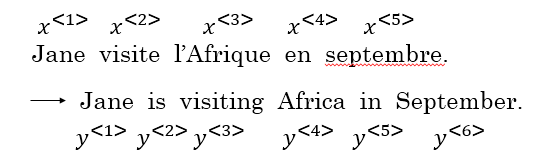

① 针对该机器翻译问题，可以使用“编码网络（encoder network）”+“解码网络（decoder network）”两个RNN模型组合的形式来解决。

② encoder network将输入语句编码为一个特征向量，传递给decoder network，完成翻译。

③ 具体模型结构如下图所示：

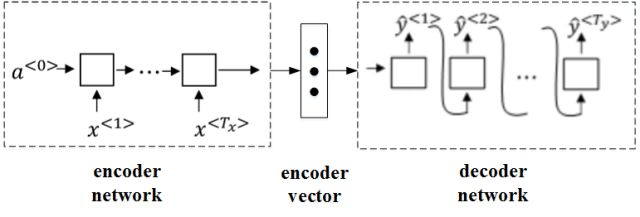

④ 其中，encoder vector代表了输入语句的编码特征。

⑤ encoder network和decoder network都是RNN模型，可使用GRU或LSTM单元。

⑥ 这种“编码网络（encoder network）”+“解码网络（decoder network）”的模型，在实际的机器翻译应用中有着不错的效果。

① 这种模型也可以应用到图像捕捉领域。

② 图像捕捉，即捕捉图像中主体动作和行为，描述图像内容。

③ 例如下面这个例子，根据图像，捕捉图像内容。

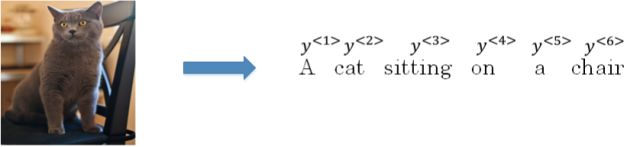

① 首先，可以将图片输入到CNN，例如使用预训练好的AlexNet，删去最后的softmax层，保留至最后的全连接层。

② 则该全连接层就构成了一个图片的特征向量（编码向量），表征了图片特征信息。

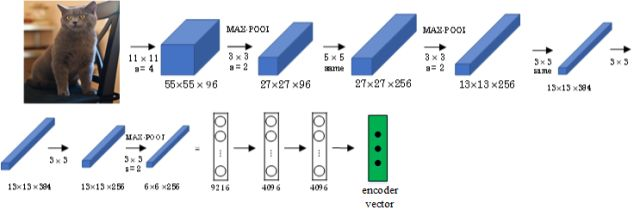

③ 然后，将encoder vector输入至RNN，即decoder network中，进行解码翻译。

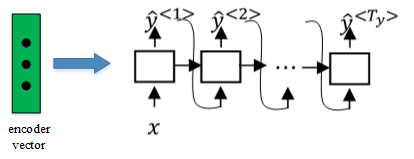

# 2. 机器翻译

① Sequence to sequence machine translation模型与我们第一节课介绍的language模型有一些相似，但也存在不同之处。二者模型结构如下所示。

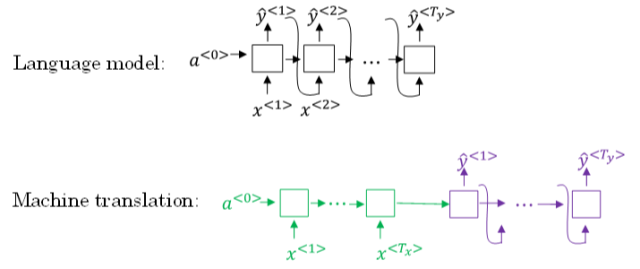

② Language model是自动生成一条完整语句，语句是随机的。而machine translation model是根据输入语句，进行翻译，生成另外一条完整语句。

③ 上图中，绿色部分表示encoder network，紫色部分表示decoder network。

④ decoder network与language model是相似的，encoder network可以看成是language model的输入，是模型的一个条件。也就是说，在输入语句的条件下，生成正确的翻译语句。

⑤ 因此，machine translation可以看成是有条件的语言模型（conditional language model）。这就是二者之间的区别与联系。

① 所以，machine translation的目标就是根据输入语句，作为条件，找到最佳翻译语句，使其概率最大：

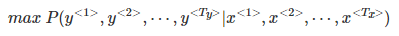

② 例如，本节笔记开始介绍的例子，列举几个模型可能得到的翻译：

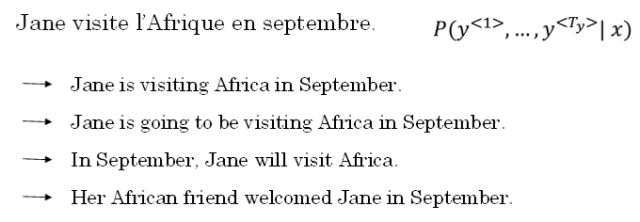

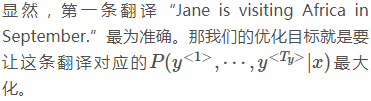

# 3. 贪婪搜索

① 实现优化目标的方法之一是使用贪婪搜索（greedy search）。

② Greedy search根据条件，每次只寻找一个最佳单词作为翻译输出，力求把每个单词都翻译准确。

③ 例如，首先根据输入语句，找到第一个翻译的单词“Jane”，然后再找第二个单词“is”，再继续找第三个单词“visiting”，以此类推。

④ 这也是其“贪婪”名称的由来。

① Greedy search存在一些缺点。

② 首先，因为greedy search每次只搜索一个单词，没有考虑该单词前后关系，概率选择上有可能会出错。

- 例如，上面翻译语句中，第三个单词“going”比“visiting”更常见，模型很可能会错误地选择了“going”，而错失最佳翻译语句。

③ 其次，greedy search大大增加了运算成本，降低运算速度。

① 因此，greedy search并不是最佳的方法。

② 下一小节，我们将介绍Beam Search，使用近似最优的查找方式，最大化输出概率，寻找最佳的翻译语句。

# 4. Beam Search

① Greedy search每次是找出预测概率最大的单词，而beam search则是每次找出预测概率最大的B个单词。其中，参数B表示取概率最大的单词个数，可调。本例中，令B=3。

② 按照beam search的搜索原理，首先，先从词汇表中找出翻译的第一个单词概率最大的B个预测单词。例如上面的例子中，预测得到的第一个单词为：in，jane，september。

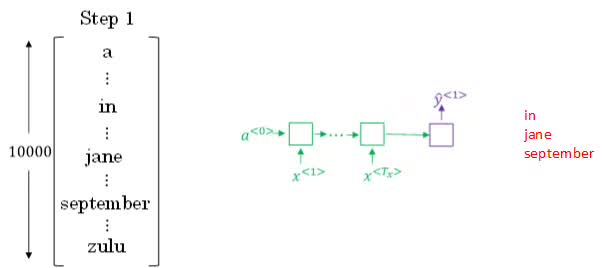

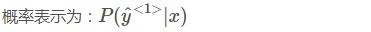

③ 然后，再分别以in，jane，september为条件，计算每个词汇表单词作为预测第二个单词的概率。

④ 从中选择概率最大的3个作为第二个单词的预测值，得到：in september，jane is，jane visits。

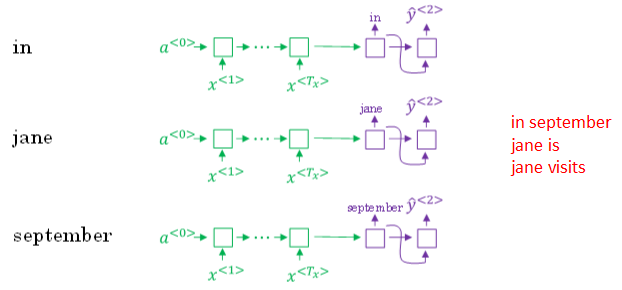

⑤ 此时，得到的前两个单词的3种情况的概率为：

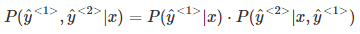

⑥ 接着，再预测第三个单词。方法一样，分别以in september，jane is，jane visits为条件，计算每个词汇表单词作为预测第三个单词的概率。从中选择概率最大的3个作为第三个单词的预测值，得到：in september jane，jane is visiting，jane visits africa。

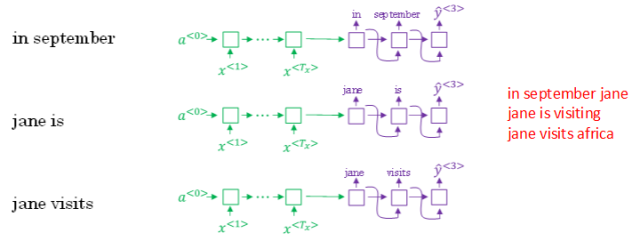

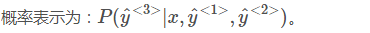

⑦ 此时，得到的前三个单词的3种情况的概率为：

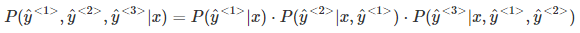

⑧ 以此类推，每次都取概率最大的三种预测。最后，选择概率最大的那一组作为最终的翻译语句。

 - Jane is visiting Africa in September.

⑨ 值得注意的是，如果参数B=1，则就等同于greedy search。实际应用中，可以根据不同的需要设置B为不同的值。一般B越大，机器翻译越准确，但同时也会增加计算复杂度。

① Beam search中，最终机器翻译的概率是乘积的形式：

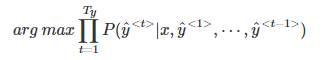

② 多个概率相乘可能会使乘积结果很小，远小于1，造成数值下溢。为了解决这个问题，可以对上述乘积形式进行取对数log运算，即：

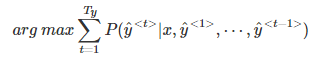

③ 因为取对数运算，将乘积转化为求和形式，避免了数值下溢，使得数据更加稳定有效。

① 这种概率表达式还存在一个问题，就是机器翻译的单词越多，乘积形式或求和形式得到的概率就越小，这样会造成模型倾向于选择单词数更少的翻译语句，使机器翻译受单词数目的影响，这显然是不太合适的。

② 因此，一种改进方式是进行长度归一化，消除语句长度影响。

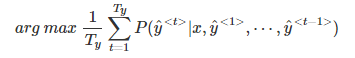

③ 实际应用中，通常会引入归一化因子α：

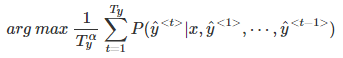

④ 若α=1，则完全进行长度归一化；若α=0，则不进行长度归一化。一般令α=0.7，效果不错。

⑤ 值得一提的是，与BFS (Breadth First Search) 、DFS (Depth First Search)算法不同，beam search运算速度更快，但是并不保证一定能找到正确的翻译语句。

① Beam search是一种近似搜索算法。

② 实际应用中，如果机器翻译效果不好，需要通过错误分析，判断是RNN模型问题还是beam search算法问题。

③ 一般来说，增加训练样本、增大beam search参数B都能提高准确率。

④ 但是，这种做法并不能得到我们期待的性能，且并不实际。

① 首先，为待翻译语句建立人工翻译，记为y∗。

② 在RNN模型上使用beam search算法，得到机器翻译，记为y^。

③ 显然，人工翻译y∗最为准确。

 - Jane visite l’Afrique en septembre.

 - Human: Jane visits Africa in September.   y∗  

 - Algorithm: Jane visited Africa last September.   y^

④ 这样，整个模型包含两部分：RNN和beam search算法。

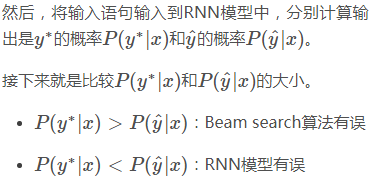

⑤ 如果beam search算法表现不佳，可以调试参数B；若RNN模型不好，则可以增加网络层数，使用正则化，增加训练样本数目等方法来优化。

# 5. Bleu Score

① 使用bleu score，对机器翻译进行打分。

② 首先，对原语句建立人工翻译参考，一般有多个人工翻译（利用验证集和测试集）。例如下面这个例子：
 
 - French: Le chat est sur le tapis.

 - Reference 1: The cat is on the mat.

 - Reference 2: There is a cat on the mat.
 
③ 上述两个人工翻译都是正确的，作为参考。相应的机器翻译如下所示：

 - French: Le chat est sur le tapis.

 - Reference 1: The cat is on the mat.

 - Reference 2: There is a cat on the mat.

 - MT output: the the the the the the the.

④ 如上所示，机器翻译为“the the the the the the the.”，效果很差。

⑤ Bleu Score的宗旨是机器翻译越接近参考的人工翻译，其得分越高，方法原理就是看机器翻译的各个单词是否出现在参考翻译中。

① 最简单的准确度评价方法是看机器翻译的每个单词是否出现在参考翻译中。

② 显然，上述机器翻译的每个单词都出现在参考翻译里，准确率为7/7=1，其中，分母为机器翻译单词数目，分子为相应单词是否出现在参考翻译中。

③ 但是，这种方法很不科学，并不可取。

① 另外一种评价方法是看机器翻译单词出现在参考翻译单个语句中的次数，取最大次数。

② 上述例子对应的准确率为2/7，其中，分母为机器翻译单词数目，分子为相应单词出现在参考翻译中的次数（分子为2是因为“the”在参考1中出现了两次）。

③ 这种评价方法较为准确。

① 上述两种方法都是对单个单词进行评价。

② 按照beam search的思想，另外一种更科学的打分方法是bleu score on bigrams，即同时对两个连续单词进行打分。

③ 仍然是上面那个翻译例子：

 - French: Le chat est sur le tapis.

 - Reference 1: The cat is on the mat.

 - Reference 2: There is a cat on the mat.

 - MT output: The cat the cat on the mat.

① 对MIT output进行分解，得到的bigrams及其出现在MIT output中的次数count为：

 - the cat: 2

 - cat the: 1

 - cat on: 1

 - on the: 1

 - the mat: 1

② 然后，统计上述bigrams出现在参考翻译单个语句中的次数（取最大次数）countclipcountclip为：

 - the cat: 1

 - cat the: 0

 - cat on: 1

 - on the: 1

 - the mat: 1

③ 相应的bigrams precision为：

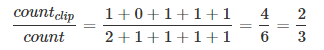

④ 如果只看单个单词，相应的unigrams precision为：

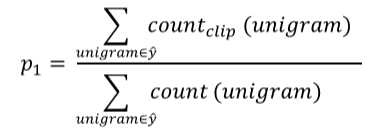

⑤ 如果是n个连续单词，相应的n-grams precision为：

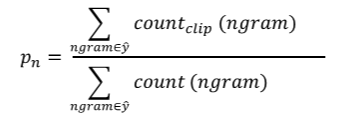

⑥ 总结一下，可以同时计算p1,⋯,pn，再对其求平均：

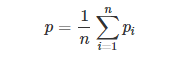

⑦ 通常，对上式进行指数处理，并引入参数因子brevity penalty，记为BP。

⑧ 顾名思义，BP是为了“惩罚”机器翻译语句过短而造成的得分“虚高”的情况。

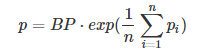

⑨ 其中，BP值由机器翻译长度和参考翻译长度共同决定。

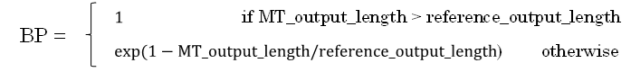

# 6. 注意力模型

① 如果原语句很长，要对整个语句输入RNN的编码网络和解码网络进行翻译，则效果不佳。

② 相应的bleu score会随着单词数目增加而逐渐降低。

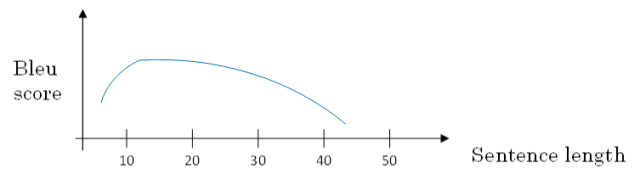

① 对待长语句，正确的翻译方法是将长语句分段，每次只对长语句的一部分进行翻译。

② 人工翻译也是采用这样的方法，高效准确。

③ 也就是说，每次翻译只注重一部分区域，这种方法使得bleu score不太受语句长度的影响。

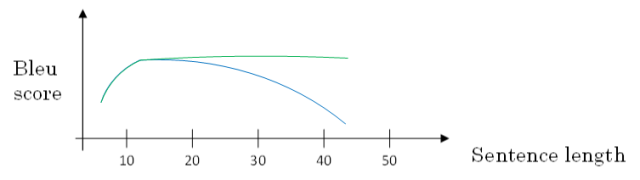

④ 根据这种“局部聚焦”的思想，建立相应的注意力模型（attention model）。

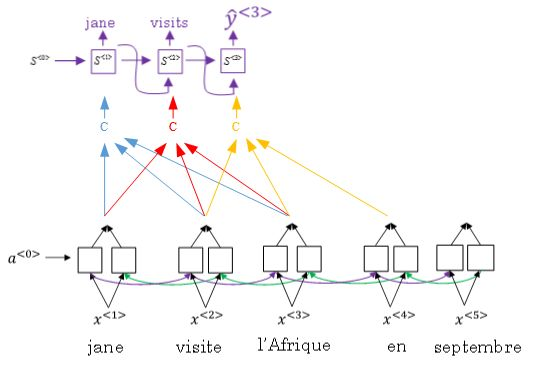

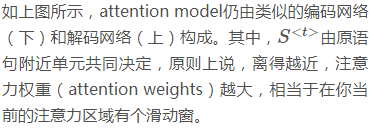

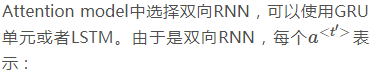

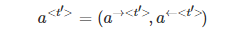

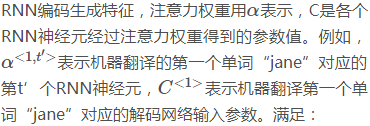

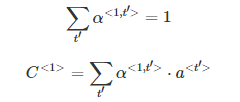

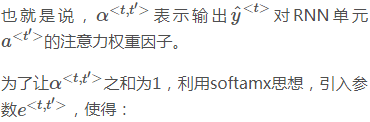

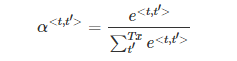

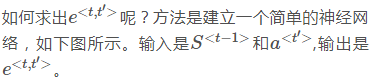

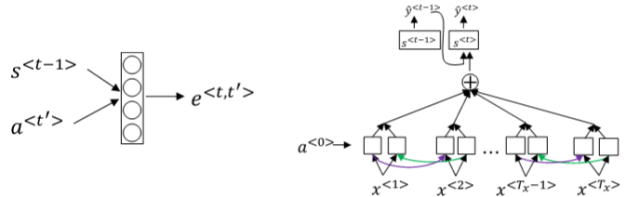

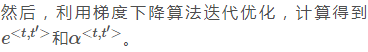

① Attention model的一个缺点是其计算量较大，若输入句子长度为Tx，输出句子长度为Ty，则计算时间约为Tx∗Ty。

② 但是，其性能提升很多，计算量大一些也是可以接受的。

③ 有趣的是，Attention model在图像捕捉方面也有应用。

④ Attention model能有效处理很多机器翻译问题，例如下面的时间格式归一化：

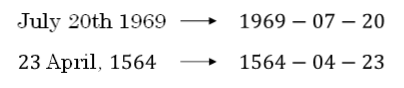

① 下图将注意力权重可视化：

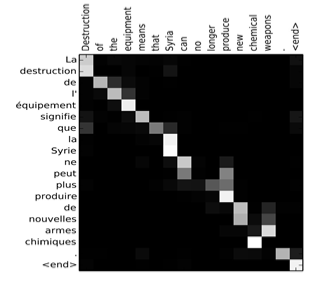

② 上图中，颜色越白表示注意力权重越大，颜色越深表示权重越小。

③ 可见，输出语句单词与其输入语句单词对应位置的注意力权重较大，即对角线附近。

# 7. 语音识别

① 深度学习中，语音识别的输入是声音，量化成时间序列。

② 更一般地，可以把信号转化为频域信号，即声谱图（spectrogram），再进入RNN模型进行语音识别。

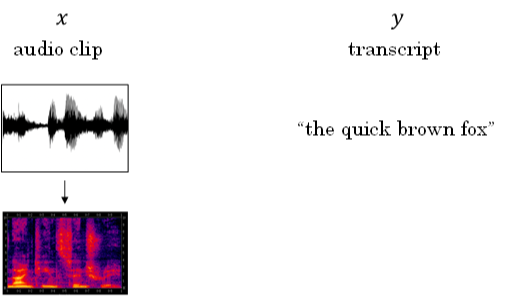

① 之前，语言学家们会将语音中每个单词分解成多个音素（phoneme），构建更精准的传统识别算法。

② 但在end-to-end深度神经网络模型中，一般不需要这么做也能得到很好的识别效果。

③ 通常训练样本很大，需要上千上万个小时的语音素材。

① 语音识别的注意力模型（attention model）如下图所示：

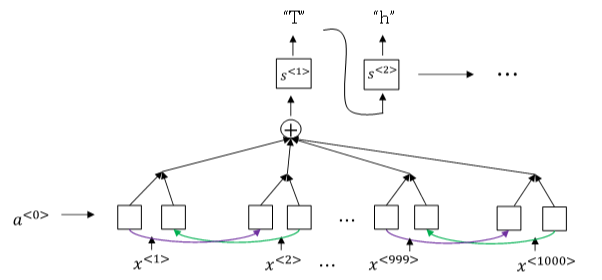

② 一般来说，语音识别的输入时间序列都比较长，例如是10s语音信号，采样率为100Hz，则语音长度为1000。

③ 而翻译的语句通常很短，例如“the quick brown fox”，包含19个字符。

④ 这时候，Tx与Ty差别很大。为了让Tx=Ty，可以把输出相应字符重复并加入空白（blank），形如：

① 其中，下划线”_“表示空白，”⊔“表示两个单词之间的空字符。这种写法的一个基本准则是没有被空白符”_“分割的重复字符将被折叠到一起，即表示一个字符。

② 这样，加入了重复字符和空白符、空字符，可以让输出长度也达到1000，即Tx=Ty。这种模型被称为CTC（Connectionist temporal classification）。

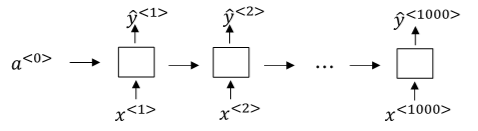

# 8. 触发字检测

① 触发字检测（Trigger Word Detection）在很多产品中都有应用，操作方法就是说出触发字通过语音来启动相应的设备。

② 例如Amazon Echo的触发字是”Alexa“，百度DuerOS的触发字是”小度你好“，Apple Siri的触发字是”Hey Siri“，Google Home的触发字是”Okay Google“。

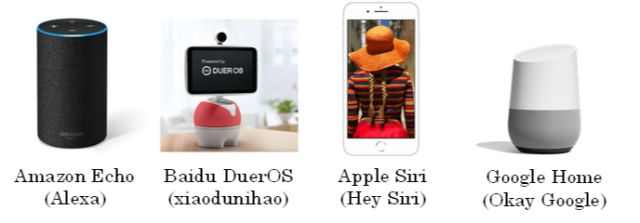

① 触发字检测系统可以使用RNN模型来建立。

② 如下图所示，输入语音中包含一些触发字，其余都是非触发字。

③ RNN检测到触发字后输出1，非触发字输出0。

④ 这样训练的RNN模型就能实现触发字检测。

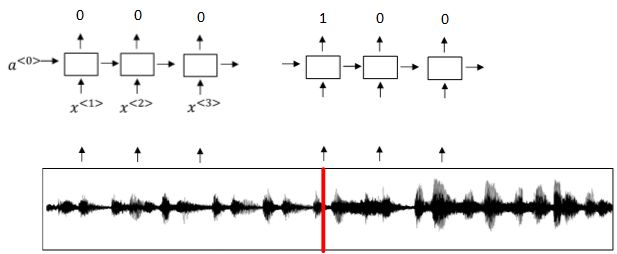

① 但是这种模型有一个缺点，就是通常训练样本语音中的触发字较非触发字数目少得多，即正负样本分布不均。

② 一种解决办法是在出现一个触发字时，将其附近的RNN都输出1。这样就简单粗暴地增加了正样本。

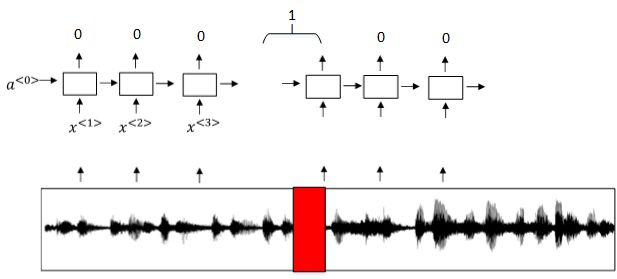